# Excercise 1

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt
import os
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.black_litterman import BlackLittermanModel
from scipy import stats

### Load Data

In [2]:
#Read excel and remove first two rows

stocks_monthly = pd.read_excel("data for exam 2022.xlsx", "stocks monthly", index_col = "Name")
stocks_monthly = stocks_monthly.iloc[2:]
stocks_monthly = stocks_monthly.astype("float32")

In [3]:
#See NAs

stocks_monthly.isna().sum()

LEONARDO         0
ECOSUNTEK        0
LANDI RENZO      0
PIRELLI & C     34
STELLANTIS       0
                ..
BEGHELLI         0
SOL              0
DATALOGIC        0
BIESSE           0
SAFILO GROUP     0
Length: 88, dtype: int64

### 1.

Focus first on the two worksheet on stocks. Compute returns for both daily and monthly
stocks. Compute mean, standard deviation, variance, skewness and kurtosis for stocks at
daily and monthly frequency. Show the results in a table and comment.

In [4]:
if not os.path.exists("descriptive_statistics_monthly"):
    os.makedirs("descriptive_statistics_monthly")

#### Compute returns

In [5]:
stocks_monthly_returns = stocks_monthly.pct_change()

stocks_monthly_returns.to_excel("Returns_monthly.xlsx")
stocks_monthly_returns

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
Name,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.248222,0.018382,0.055555,NaN,0.222921,0.175224,0.128881,0.058629,NaN,-0.005623,...,0.019406,0.164513,0.139924,0.127326,0.065354,-0.001245,0.021788,0.138202,0.356838,0.197601
2015-03-01,0.121699,0.002888,-0.020096,NaN,0.201009,0.116679,0.093700,0.148986,NaN,0.116867,...,0.062463,0.028943,0.075829,0.022589,0.054622,0.034913,0.026471,0.041461,0.300000,0.078228
2015-04-01,0.048938,-0.015839,0.113281,NaN,0.072351,0.381238,0.107602,0.086897,NaN,0.080171,...,0.554311,0.069388,0.096916,0.228547,0.023904,0.139759,0.166189,0.036019,-0.052695,0.037358
2015-05-01,0.007923,-0.136796,-0.050000,NaN,-0.117069,-0.121724,-0.057550,-0.058089,NaN,0.007810,...,-0.152017,0.046754,0.030522,0.000000,-0.035798,-0.008457,-0.041769,0.056725,-0.079284,-0.098340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,0.008140,-0.097345,0.009535,0.027633,0.000923,-0.004149,-0.062647,0.138593,-0.003014,0.036213,...,-0.001011,-0.083134,-0.098315,-0.098551,0.020492,0.009302,-0.093079,-0.118029,-0.078212,-0.018868
2022-03-01,0.260248,0.039216,-0.054309,-0.272224,-0.121541,-0.079167,-0.120301,-0.207303,-0.126228,-0.256421,...,-0.202429,-0.087184,0.067757,-0.041801,-0.232932,-0.211982,-0.082105,-0.125735,-0.199134,-0.169231
2022-04-01,0.119517,-0.028302,0.094881,0.066290,-0.029273,0.049774,-0.050332,-0.005433,0.035467,-0.056059,...,0.054569,-0.002865,0.128374,-0.063758,0.193717,0.175439,-0.044725,-0.170732,-0.110270,0.173611


#### Mean

In [6]:
stocks_monthly_mean = stocks_monthly_returns.mean()

stocks_monthly_mean.to_excel("descriptive_statistics_monthly/Mean.xlsx")
stocks_monthly_mean

LEONARDO        0.009610
ECOSUNTEK       0.021695
LANDI RENZO     0.009876
PIRELLI & C    -0.002733
STELLANTIS      0.019316
                  ...   
BEGHELLI        0.003540
SOL             0.013177
DATALOGIC       0.005634
BIESSE          0.014640
SAFILO GROUP   -0.005856
Length: 88, dtype: float32

#### Standard Deviation

In [7]:
stocks_monthly_std = stocks_monthly_returns.std()

stocks_monthly_std.to_excel("descriptive_statistics_monthly/Standard_Deviation.xlsx")
stocks_monthly_std

LEONARDO        0.114400
ECOSUNTEK       0.313553
LANDI RENZO     0.177365
PIRELLI & C     0.094727
STELLANTIS      0.121189
                  ...   
BEGHELLI        0.093682
SOL             0.059766
DATALOGIC       0.110317
BIESSE          0.128123
SAFILO GROUP    0.144450
Length: 88, dtype: float32

#### Variance

In [8]:
stocks_monthly_var = stocks_monthly_returns.var()

stocks_monthly_var.to_excel("descriptive_statistics_monthly/Variance.xlsx")
stocks_monthly_var

LEONARDO        0.013087
ECOSUNTEK       0.098316
LANDI RENZO     0.031458
PIRELLI & C     0.008973
STELLANTIS      0.014687
                  ...   
BEGHELLI        0.008776
SOL             0.003572
DATALOGIC       0.012170
BIESSE          0.016415
SAFILO GROUP    0.020866
Length: 88, dtype: float32

#### Skewness

In [9]:
stocks_monthly_skew = stocks_monthly_returns.skew()

stocks_monthly_skew.to_excel("descriptive_statistics_monthly/Skewness.xlsx")
stocks_monthly_skew

LEONARDO        0.193023
ECOSUNTEK       7.514438
LANDI RENZO     3.536020
PIRELLI & C    -0.546887
STELLANTIS     -0.247899
                  ...   
BEGHELLI        1.525345
SOL             0.217871
DATALOGIC       0.355408
BIESSE         -0.209335
SAFILO GROUP    1.014785
Length: 88, dtype: float32

#### Kurtosis

In [10]:
stocks_monthly_kurtosis = stocks_monthly_returns.kurtosis()

stocks_monthly_kurtosis.to_excel("descriptive_statistics_monthly/Kurtosis.xlsx")
stocks_monthly_kurtosis

LEONARDO         2.799835
ECOSUNTEK       65.225105
LANDI RENZO     20.781860
PIRELLI & C      1.439849
STELLANTIS       1.149909
                  ...    
BEGHELLI         4.704557
SOL             -0.639451
DATALOGIC       -0.102547
BIESSE           0.409679
SAFILO GROUP     3.060821
Length: 88, dtype: float32

### 2.

Compute the variance-covariance matrix and the correlation matrix.

#### Variance-Covariance matrix

In [11]:
stocks_monthly_cov = stocks_monthly_returns.cov()

stocks_monthly_cov.to_excel("descriptive_statistics_monthly/Variance-Covariance.xlsx")
stocks_monthly_cov

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,0.013087,0.006668,0.005743,0.003904,0.006230,0.004213,0.004984,0.006115,0.003331,0.005600,...,0.002248,0.004843,0.001937,0.004686,0.003044,0.002448,0.000524,0.004602,0.004948,0.004804
ECOSUNTEK,0.006668,0.098316,0.005484,0.003004,-0.000730,0.001382,0.001921,-0.000064,0.003138,0.004037,...,-0.000091,-0.000320,0.003315,0.002027,0.007382,0.000367,0.003404,0.002424,0.009367,0.002830
LANDI RENZO,0.005743,0.005484,0.031458,0.006595,0.006633,0.007946,0.004847,0.006857,0.006524,0.007401,...,0.002303,0.001409,0.003803,0.008346,0.007173,0.002675,0.001079,0.004799,0.006722,0.004930
PIRELLI & C,0.003904,0.003004,0.006595,0.008973,0.006873,0.005901,0.006721,0.007029,0.005996,0.007887,...,0.006244,0.003227,0.001265,0.005606,0.005190,0.004041,0.001597,0.005675,0.005178,0.004763
STELLANTIS,0.006230,-0.000730,0.006633,0.006873,0.014687,0.006373,0.006600,0.006894,0.006019,0.008275,...,0.009186,0.005701,0.002385,0.004995,0.005976,0.003392,0.001251,0.006647,0.008282,0.003975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEGHELLI,0.002448,0.000367,0.002675,0.004041,0.003392,0.004883,0.002643,0.004106,0.002458,0.004393,...,0.002755,0.003371,0.001906,0.002764,0.003616,0.008776,0.002047,0.002078,0.003133,0.003582
SOL,0.000524,0.003404,0.001079,0.001597,0.001251,0.002537,0.002299,0.001132,0.001219,0.001865,...,0.002920,0.002613,0.000949,0.001625,0.001622,0.002047,0.003572,0.001638,0.002259,0.001798
DATALOGIC,0.004602,0.002424,0.004799,0.005675,0.006647,0.005676,0.006059,0.004458,0.004706,0.005111,...,0.005747,0.004933,0.000908,0.004693,0.004341,0.002078,0.001638,0.012170,0.007517,0.006257
BIESSE,0.004948,0.009367,0.006722,0.005178,0.008282,0.005441,0.006358,0.006714,0.004794,0.007755,...,0.006334,0.003700,0.002801,0.005088,0.006758,0.003133,0.002259,0.007517,0.016415,0.006795


#### Correlation matrix

In [12]:
stocks_monthly_corr = stocks_monthly_returns.corr()

stocks_monthly_corr.to_excel("descriptive_statistics_monthly/Correlation.xlsx")
stocks_monthly_corr

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,1.000000,0.185880,0.283061,0.327243,0.449374,0.292682,0.480384,0.542024,0.288258,0.407672,...,0.109944,0.341712,0.238569,0.489952,0.275098,0.228396,0.076602,0.364657,0.337550,0.290690
ECOSUNTEK,0.185880,1.000000,0.098613,0.261807,-0.019218,0.035021,0.067541,-0.002082,0.265129,0.107244,...,-0.001626,-0.008231,0.148930,0.077337,0.243445,0.012501,0.181628,0.070070,0.233168,0.062475
LANDI RENZO,0.283061,0.098613,1.000000,0.569212,0.308572,0.356040,0.301317,0.392011,0.516125,0.347546,...,0.072639,0.064121,0.302075,0.562796,0.418176,0.160988,0.101763,0.245250,0.295800,0.192441
PIRELLI & C,0.327243,0.261807,0.569212,1.000000,0.598599,0.606754,0.723422,0.716710,0.598907,0.701089,...,0.328111,0.376107,0.175105,0.682974,0.522808,0.398810,0.314139,0.494185,0.426266,0.298137
STELLANTIS,0.449374,-0.019218,0.308572,0.598599,1.000000,0.417912,0.600518,0.576849,0.542152,0.568661,...,0.423995,0.379707,0.277196,0.493037,0.509926,0.298731,0.172715,0.497158,0.533368,0.227049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEGHELLI,0.228396,0.012501,0.160988,0.398810,0.298731,0.414288,0.311067,0.444465,0.217921,0.390544,...,0.164503,0.290469,0.286699,0.352944,0.399102,1.000000,0.365517,0.201067,0.261032,0.264668
SOL,0.076602,0.181628,0.101763,0.314139,0.172715,0.337397,0.424241,0.192037,0.217970,0.259963,...,0.273274,0.352864,0.223583,0.325222,0.280669,0.365517,1.000000,0.248507,0.295062,0.208310
DATALOGIC,0.364657,0.070070,0.245250,0.494185,0.497158,0.408921,0.605636,0.409779,0.388649,0.385845,...,0.291415,0.361002,0.115955,0.508871,0.406857,0.201067,0.248507,1.000000,0.531827,0.392641
BIESSE,0.337550,0.233168,0.295800,0.426266,0.533368,0.337492,0.547190,0.531381,0.388951,0.504130,...,0.276530,0.233089,0.307966,0.474994,0.545440,0.261032,0.295062,0.531827,1.000000,0.367143


### 3.

Plot the behavior of the security prices you have chosen, both in daily and monthly frequency
during the entire lenght of the sample size.

In [13]:
stocks_monthly_clean = stocks_monthly_returns.loc[:,(stocks_monthly.isna().sum() == 0)]
stocks_monthly_clean

,LEONARDO,ECOSUNTEK,LANDI RENZO,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,UNICREDIT,BANCA GENERALI,BPER BANCA,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
Name,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.248222,0.018382,0.055555,0.222921,0.175224,0.128881,0.058629,-0.005623,0.075922,0.107942,...,0.019406,0.164513,0.139924,0.127326,0.065354,-0.001245,0.021788,0.138202,0.356838,0.197601
2015-03-01,0.121699,0.002888,-0.020096,0.201009,0.116679,0.093700,0.148986,0.116867,0.016532,0.184141,...,0.062463,0.028943,0.075829,0.022589,0.054622,0.034913,0.026471,0.041461,0.300000,0.078228
2015-04-01,0.048938,-0.015839,0.113281,0.072351,0.381238,0.107602,0.086897,0.080171,0.155891,0.118561,...,0.554311,0.069388,0.096916,0.228547,0.023904,0.139759,0.166189,0.036019,-0.052695,0.037358
2015-05-01,0.007923,-0.136796,-0.050000,-0.117069,-0.121724,-0.057550,-0.058089,0.007810,0.028140,-0.077939,...,-0.152017,0.046754,0.030522,0.000000,-0.035798,-0.008457,-0.041769,0.056725,-0.079284,-0.098340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,0.008140,-0.097345,0.009535,0.000923,-0.004149,-0.062647,0.138593,0.036213,-0.072053,0.021751,...,-0.001011,-0.083134,-0.098315,-0.098551,0.020492,0.009302,-0.093079,-0.118029,-0.078212,-0.018868
2022-03-01,0.260248,0.039216,-0.054309,-0.121541,-0.079167,-0.120301,-0.207303,-0.256421,-0.120632,-0.137331,...,-0.202429,-0.087184,0.067757,-0.041801,-0.232932,-0.211982,-0.082105,-0.125735,-0.199134,-0.169231
2022-04-01,0.119517,-0.028302,0.094881,-0.029273,0.049774,-0.050332,-0.005433,-0.056059,0.080101,-0.027084,...,0.054569,-0.002865,0.128374,-0.063758,0.193717,0.175439,-0.044725,-0.170732,-0.110270,0.173611


In [14]:
correlation_matrix = stocks_monthly_clean.corr()

#### See what companies correlate the less

In [15]:
def pick_securities(correlation_matrix, number_of_securities = 12):

    securities = []    
    
    #Pick the 2 securities with less correlation
    security_1 = correlation_matrix.min().argmin()
    securities.append(security_1)
    
    security_2 = correlation_matrix.iloc[securities[0], :].argmin()
    securities.append(security_2)
    
    #Pick the rest of the securities (min-max correlation)
    if number_of_securities > 2:
        for _ in range(number_of_securities-2):
            security = correlation_matrix.iloc[securities].max().argmin()
            securities.append(security)
    
    return securities

In [16]:
#Pick 12 securities and see their correlation matrix

securities_index = pick_securities(correlation_matrix, number_of_securities = 12)
securities = list(correlation_matrix.iloc[securities_index, securities_index].columns)
correlation_matrix.iloc[securities_index, securities_index]

correlation_matrix.iloc[securities_index, securities_index].to_excel("Securities_Correlation.xlsx")

### 4. 

Plot the behavior of the security prices you have chosen, both in daily and monthly frequency
during the entire lenght of the sample size.

In [17]:
if not os.path.exists("figures_monthly"):
    os.makedirs("figures_monthly")

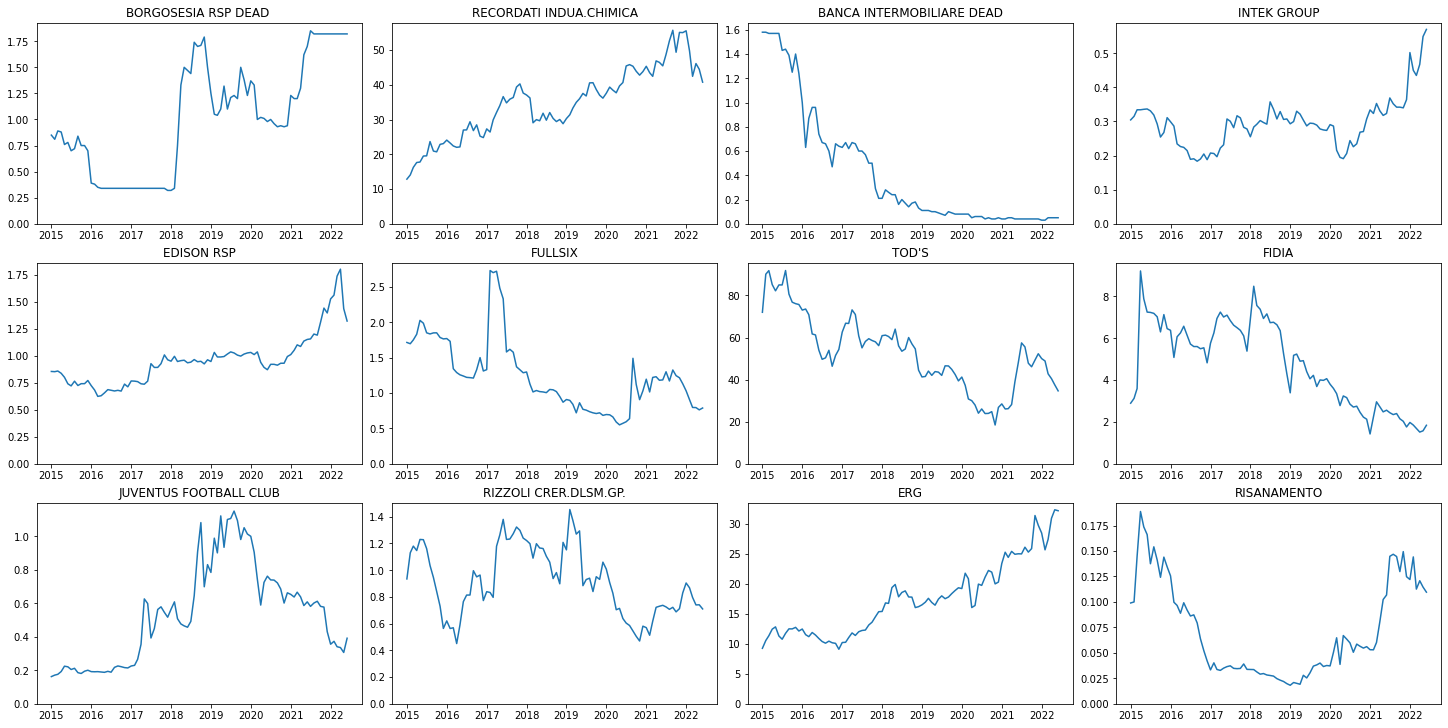

In [18]:
#Plot prices

fig = plt.figure(figsize = (20,10), constrained_layout=True)
ax_array = fig.subplots(3, 4, squeeze=False)
sec_array = np.array(securities).reshape(3,4)
for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].plot(stocks_monthly[sec_array[i, j]])
        ax_array[i, j].set_title(sec_array[i, j])
        ax_array[i, j].set_ylim(bottom=0)

plt.savefig("figures_monthly/prices_over_time.png",dpi = 400)    

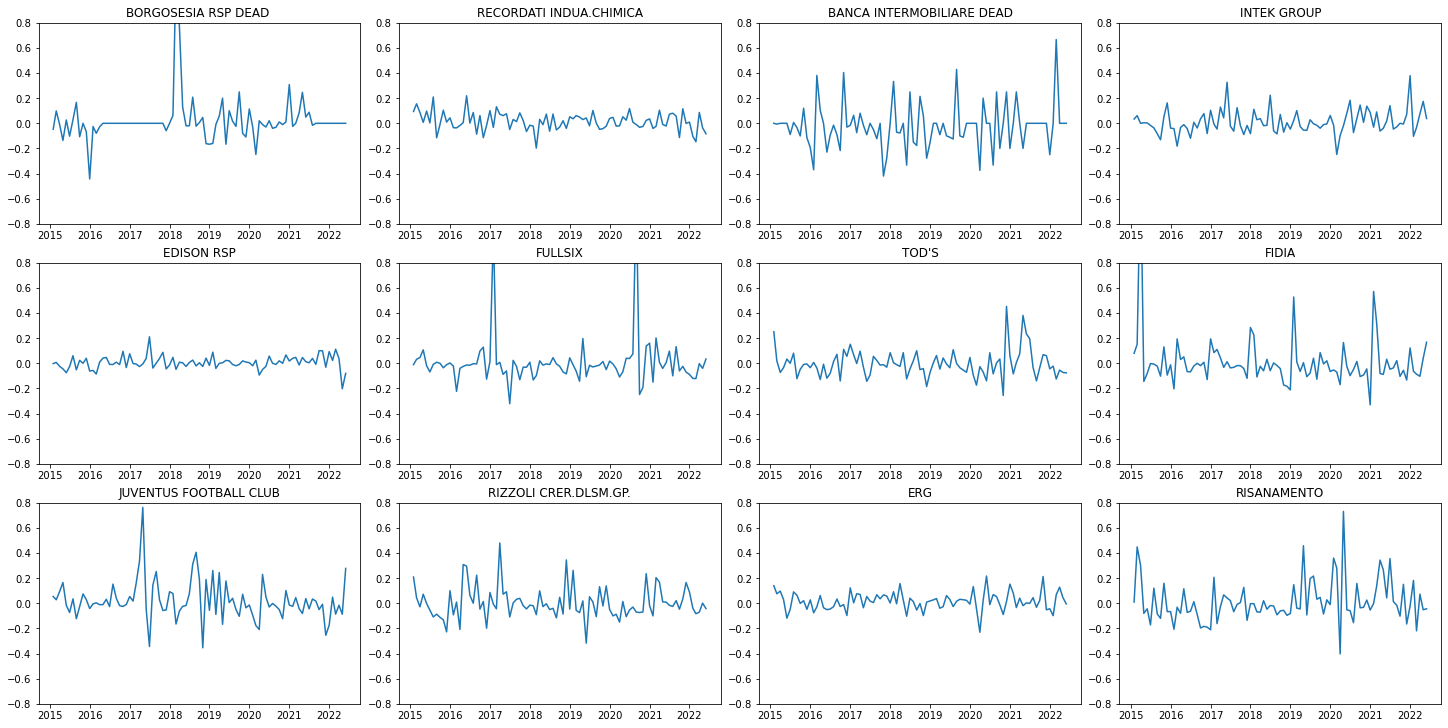

In [19]:
#Plot returns

fig = plt.figure(figsize = (20,10), constrained_layout=True)
ax_array = fig.subplots(3, 4, squeeze=False)
sec_array = np.array(securities).reshape(3,4)
for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].plot(stocks_monthly_returns[sec_array[i, j]])
        ax_array[i, j].set_title(sec_array[i, j])
        ax_array[i, j].set_ylim([-0.8, 0.8])

plt.savefig("figures_monthly/returns_over_time.png",dpi = 400)        

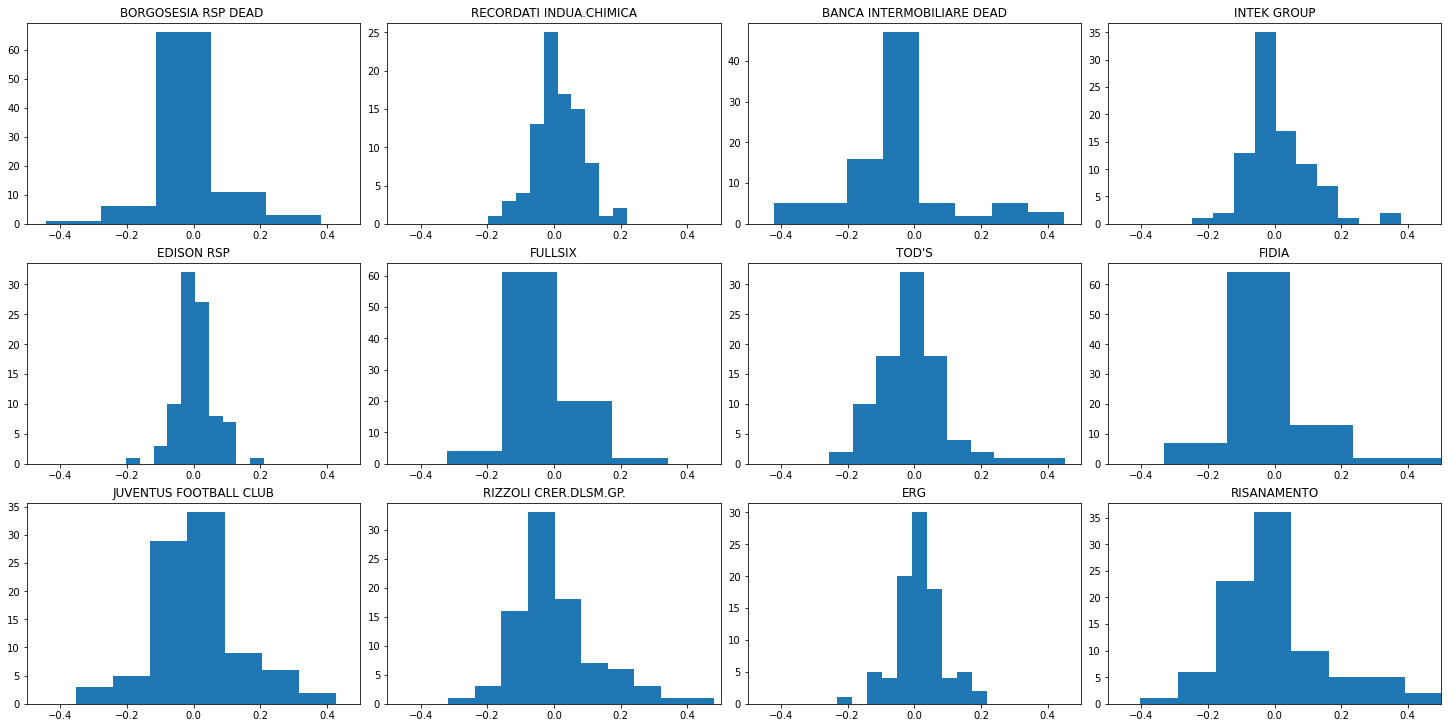

In [20]:
#Distribution of returns

fig = plt.figure(figsize = (20,10), constrained_layout=True)
ax_array = fig.subplots(3, 4, squeeze=False)
sec_array = np.array(securities).reshape(3,4)
for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].hist(stocks_monthly_returns[sec_array[i, j]], bins='sqrt')
        ax_array[i, j].set_title(sec_array[i, j])
        ax_array[i, j].set_xlim([-0.5, 0.5])

plt.savefig("figures_monthly/distributions_of_returns.png",dpi = 400)       

### 5.

Compute the Mean Variance optimal portfolio allocation for the sample of securities chosen
by you both in daily and monthly frequency. Discuss.

#### Weights

In [21]:
#Define the expected return vector and the variance.covariance matrix for our securities

μ = np.array(stocks_monthly_mean[securities]).reshape((len(securities),))
Σ = np.array(stocks_monthly_cov.loc[securities, securities])

In [22]:
Σ.shape

(12, 12)

Code for efficient Mean Variance would look like this if implemented from scratch, however we use the more efficient implementation in the PyPortfolioOptimization library.

```python

    def compute_efficient_portfolio(μ, Σ, mu_p):
    
        #Vector of ones with length equal to the number of rows of the variance-covariance matrix
        ι = np.ones((Σ.shape[0]))
    
        #Compute the information matrix
        A = μ.T @ alg.inv(Σ) @ μ 
        B = ι.T @ alg.inv(Σ)@ μ
        C = ι.T @ alg.inv(Σ) @ ι
    
        I = np.array([
            [A , B],
            [B , C]
        ])

        #Compute the weights    
        W = 1/alg.det(I)*alg.inv(Σ)@(C*μ-B)*mu_p + (alg.inv(Σ) @ ι)/alg.det(I)*(A-B*μ)
    
        return W
    
```

In [23]:
#Vector of ones with length equal to the number of rows of the variance-covariance matrix
ι = np.ones((Σ.shape[0]))
    
#Compute the information matrix
A = μ.T @ alg.inv(Σ) @ μ 
B = ι.T @ alg.inv(Σ)@ μ
C = ι.T @ alg.inv(Σ) @ ι
    
I = np.array([
    [A , B],
    [B , C]
])

In [24]:
efficient_mv = EfficientFrontier(μ, Σ, weight_bounds=(-1,1))
W = efficient_mv.efficient_return(0.01)
W = np.array(list(W.values()))

#### Efficient Frontier

In [25]:
def compute_mean_variance_frontier(I, mu_p):
    """
    This function computes the minimum variance obtainable, according to 
    the Mean-Variance frontier, given the Information Matrix (I)
    (which encodes the μ and Σ) and a target expected return (mu_p)
    
    """
    
    
    A = I[0, 0]
    B = I[1, 0]
    C = I[1, 1]
        
    variance_p = 1/(A*C-B**2)*(A - 2*B*mu_p + C*mu_p**2)  
    return variance_p   

In [26]:
A = I[0, 0]
B = I[1, 0]
C = I[1, 1]

print(f"The minimum variance point on the efficient frontier has E(R) = {B/C:.6f} and σ = {1/C:.6f}")

The minimum variance point on the efficient frontier has E(R) = 0.009861 and σ = 0.001322


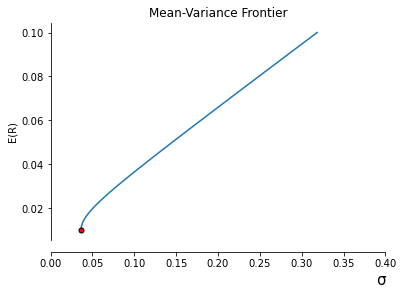

In [27]:
mu_p_top = np.linspace(B/C, 0.1, 100)
variance_p_top = compute_mean_variance_frontier(I, mu_p_top)


fig, ax = plt.subplots()

#Efficient frontier without constraints
ax.plot(np.sqrt(variance_p_top),    mu_p_top,    color = "tab:blue")

ax.set_xlim([0, 0.4])

#Axes aesthetics
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.plot(1/np.sqrt(C), B/C, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red")

plt.xlabel("σ",fontdict={"fontsize":15}, loc="right")
plt.ylabel("E(R)")

plt.title("Mean-Variance Frontier");

plt.savefig("figures_monthly/mean_variance_frontier.png",dpi = 400) 

### 6.

Compute the same asset allocation after imposing non-negativity constraint on portfolio
weights.

In [28]:
efficient_frontier = EfficientFrontier(μ, Σ, weight_bounds=(0, 1))

In [29]:
W_constrained = list(efficient_frontier.efficient_return(0.001).values())
print(np.matrix(W_constrained))

[[0.06416925 0.23502472 0.02974151 0.04958333 0.42548543 0.02790048
  0.01973049 0.00464103 0.04417801 0.01738729 0.08215848 0.        ]]


In [30]:
#Efficient frontier without constraints
mu_p_top = np.linspace(B/C, 0.03, 100)
variance_p_top = compute_mean_variance_frontier(I, mu_p_top)
 
#Efficient frontier with constraint    
mu_p_top_constrained = np.linspace(B/C, 0.02, 100)
portfolios_constrained = map(efficient_frontier.efficient_return, mu_p_top_constrained)
W_c_array = np.array([list(portfolio.values()) for portfolio in portfolios_constrained])
variance_p_top_constrained = np.diag(W_c_array @ Σ @ W_c_array.T)

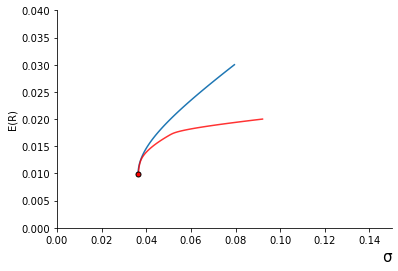

In [31]:
fig, ax = plt.subplots()

#Efficient frontier without constraints plotting
ax.plot(np.sqrt(variance_p_top),    mu_p_top,    color = "tab:blue")

#Efficient frontier with constraint plotting
ax.plot(np.sqrt(variance_p_top_constrained), mu_p_top_constrained, color = "red", alpha=0.8)

ax.set_xlim([0, 0.15])
ax.set_ylim([0, 0.04])

#Axes aesthetics
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.plot(1/np.sqrt(C), B/C, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red")

#Labels
plt.xlabel("σ",fontdict={"fontsize":15}, loc="right")
plt.ylabel("E(R)")

;

plt.savefig("figures_monthly/mean_variance_frontier_constrained.png",dpi = 400,) 

### 7.

Given previous results, compute mean, standard deviations, variance, skewness and kurtosis
of your optimal mean-variance portfolios, both for daily and monthly frequency. Provide the
necessary intuition by making extensive comments

In [32]:
def coskew(df):
    
    # Number of stocks
    num = len(df.columns)
    
    # Two dimionsal matrix for tensor product 
    mtx = np.zeros(shape = (len(df), num**2))
    
    v = df.values
    means = v.mean(0,keepdims=True)
    v1 = (v-means).T
    
    for i in range(num):
        for j in range(num):
                vals = v1[i]*v1[j]
                mtx[:,(i*num)+j] = vals/float((len(df)-1)*df.iloc[:,i].std()*df.iloc[:,j].std())
    
    #coskewness matrix
    m3 = np.dot(v1,mtx)
    
    #Normalize by dividing by standard deviation
    for i in range(num**2):
        use = i%num
        m3[:,i] = m3[:,i]/float(df.iloc[:,use].std())
    
    return m3

In [33]:
def cokurt(df):
    # Number of stocks
    num = len(df.columns)
    
    #First Tensor Product Matrix
    mtx1 = np.zeros(shape = (len(df), num**2))
    
    #Second Tensor Product Matrix
    mtx2 = np.zeros(shape = (len(df), num**3))
    
    v = df.values
    means = v.mean(0,keepdims=True)
    v1 = (v-means).T

    for k in range(num):
        for i in range(num):
            for j in range(num):
                    vals = v1[i]*v1[j]*v1[k]
                    mtx2[:,(k*(num**2))+(i*num)+j] = vals/float((len(df)-1)*df.iloc[:,i].std()*\
                                                                df.iloc[:,j].std()*df.iloc[:,k].std())

    m4 = np.dot(v1,mtx2)
    for i in range(num**3):
        use = i%num
        m4[:,i] = m4[:,i]/float(df.iloc[:,use].std())
        
    return m4



In [34]:
def portfolio_statistics(W, μ, Σ):
    stats = {}
    stats["Mean"] = np.sum(μ * W)
    
    stats["Variance"] = np.dot(W.T, np.dot(Σ, W))
    
    stats["Standard Deviation"] = np.sqrt(stats["Variance"])
    
    m3 = coskew(stocks_monthly_returns[securities].dropna())
    stats["Skewness"] = np.dot(W.T, np.dot(m3,np.kron(W,W)))

    m4 = cokurt(stocks_monthly_returns[securities].dropna())
    stats["Kurtosis"] = np.dot(W.T, np.dot(m4,np.kron(W,np.kron(W,W))))
    return stats



In [35]:
portfolio_statistics(W, μ, Σ) 

{'Mean': 0.010000000000000004,
 'Variance': 0.0013221567282809272,
 'Standard Deviation': 0.03636147313133679,
 'Skewness': -0.0469345343417528,
 'Kurtosis': 0.33955577029790446}

#### Constrained Portfolio Statistics

In [36]:
portfolio_statistics(np.array(W_constrained), μ, Σ) 

{'Mean': 0.01004473676000378,
 'Variance': 0.001337018723222543,
 'Standard Deviation': 0.036565266623156775,
 'Skewness': -0.05714192534044774,
 'Kurtosis': 0.3433102354981294}

### 9.

Consider an index representative of the Italian stock market, such as FTSE Italia All Market,
given in the two distinct worksheets, one for the daily and one for monthly version. The index
is here collected in its Total Return version. Compute all the statistics relative to that index
(mean, standard deviation, variance, kurtosis and skewness). Discuss the differences between
such statistics for the index and those you found for your portfolio.

In [37]:
#Read excel and remove first two rows

ftse_monthly = pd.read_excel("data for exam 2022.xlsx", "ftse italia all share monthly", index_col = "Name", )
ftse_monthly = ftse_monthly.iloc[2:]
ftse_monthly = ftse_monthly.astype("float32")


In [38]:
ftse_monthly_returns = ftse_monthly.pct_change()

ftse_monthly_returns.to_excel("FTSE_Returns_monthly.xlsx")
ftse_monthly_returns

,FTSE ITALIA ALL SHARE - PRICE INDEX
Name,
2015-01-01,NaN
2015-02-01,0.080915
2015-03-01,0.090010
2015-04-01,0.051102
2015-05-01,-0.012788
...,...
2022-02-01,-0.022103
2022-03-01,-0.103161
2022-04-01,0.031544


#### Mean

In [39]:
ftse_monthly_mean = ftse_monthly_returns.mean()
print(f"Mean: {ftse_monthly_mean[0]}")

Mean: 0.004804140888154507


#### Standard Deviation

In [40]:
ftse_monthly_std = ftse_monthly_returns.std()

print(f"Standard Deviation: {ftse_monthly_std[0]}")

Standard Deviation: 0.05789688229560852


#### Variance

In [41]:
ftse_monthly_var = ftse_monthly_returns.var()

print(f"Variance: {ftse_monthly_var[0]}")

Variance: 0.003352048806846142


#### Skewness

In [42]:
ftse_monthly_skew = ftse_monthly_returns.skew()

print(f"Skewness: {ftse_monthly_skew[0]}")

Skewness: -0.5379188656806946


#### Kurtosis

In [43]:
ftse_monthly_kurtosis = ftse_monthly_returns.kurtosis()

print(f"Kurtosis: {ftse_monthly_kurtosis[0]}")

Kurtosis: 3.4453206062316895


### 10.

Compute the beta for each security included in your portfolio and the beta for your portfolio
as well.

In [44]:
betas = {}

for security in securities:
    
    beta, alpha = stats.linregress(x=ftse_monthly_returns[1:1952].iloc[:,0],
                y=[*stocks_monthly_returns[security][1:].values])[0:2]
                
    betas[security] = beta
    
    print(f"The beta for {security} is {beta:.4f}")

The beta for BORGOSESIA RSP DEAD  is 0.0848
The beta for RECORDATI INDUA.CHIMICA is 0.4666
The beta for BANCA INTERMOBILIARE DEAD is 0.7934
The beta for INTEK GROUP is 0.6307
The beta for EDISON RSP is 0.3024
The beta for FULLSIX is 0.2862
The beta for TOD'S is 0.7845
The beta for FIDIA is 1.0864
The beta for JUVENTUS FOOTBALL CLUB is 0.8157
The beta for RIZZOLI CRER.DLSM.GP. is 0.8840
The beta for ERG is 0.5408
The beta for RISANAMENTO is 1.1171


In [45]:
portfolio_returns = (stocks_monthly_returns[securities]*W).sum(axis=1)

(beta_portfolio, alpha) = stats.linregress(x=ftse_monthly_returns[1:1952].iloc[:,0],
             y= [*portfolio_returns.values][1:])[0:2]
                

print(f"The beta for the Portfolio is {beta_portfolio:.4f}")

The beta for the Portfolio is 0.4082


### 11.

Given a return for a Risk-Free security equal to 0.5 per cent (0.005), compute the Security
Market Line (SML)for two (2) securities of your portfolio and for your portfolio as well. Verify
for the two chosen securities if the SML is verified., for both daily and monthly frequency.

In [46]:
#Convert anual rate to monthly
risk_free_rate_monthly = 1.0005**(1/23)-1

In [47]:
SML_portfolio = risk_free_rate_monthly + (ftse_monthly_mean - risk_free_rate_monthly) * beta_portfolio
SML_erg = risk_free_rate_monthly + (ftse_monthly_mean - risk_free_rate_monthly) * betas["ERG"]
SML_fullsix = risk_free_rate_monthly + (ftse_monthly_mean  - risk_free_rate_monthly) * betas["FULLSIX"]

return_portfolio = 0.01
return_erg = stocks_monthly_mean["ERG"]
return_fullsix = stocks_monthly_mean["FULLSIX"]

print(f"SML Portfolio: {SML_portfolio.values[0]:.8f}")
print(f"SML ERG: {SML_erg.values[0]:.8f}")
print(f"SML Fullsix: {SML_fullsix.values[0]:.8f}")

SML Portfolio: 0.00197411
SML ERG: 0.00260816
SML Fullsix: 0.00139059


/home/santiago/miniconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


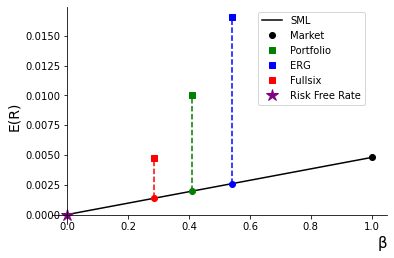

In [48]:
fig, ax = plt.subplots()

#Security Market Line
plt.plot([0,1], (risk_free_rate_monthly, ftse_monthly_mean), 'k', label="SML")

#Portfolio and Securities
plt.plot(1, ftse_monthly_mean, 'ko', label="Market")

#Returns
plt.plot(beta_portfolio, return_portfolio, 'gs', label="Portfolio")
plt.plot(betas["ERG"],  return_erg, 'bs', label="ERG")
plt.plot(betas["FULLSIX"], return_fullsix, 'rs', label="Fullsix")

#Proyection over the SML
plt.plot(beta_portfolio, SML_portfolio, 'go')
plt.plot(betas["ERG"],  SML_erg, 'bo')
plt.plot(betas["FULLSIX"], SML_fullsix, 'ro')

#Dashed lines
plt.vlines(beta_portfolio, SML_portfolio, return_portfolio, 'g', linestyle = "dashed")
plt.vlines(betas["ERG"], SML_erg, return_erg, 'b', linestyle = "dashed")
plt.vlines(betas["FULLSIX"], SML_fullsix, return_fullsix, 'r', linestyle = "dashed")
           
#Axes aesthetics
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.set_xlabel("β", fontsize=15, loc="right")
ax.set_ylabel("E(R)", fontsize=14)

ax.plot(0, risk_free_rate_monthly, "*", color="purple", markersize = 12, label = "Risk Free Rate")

ax.legend(bbox_to_anchor=(0.6, 1));

plt.savefig("figures_monthly/Security_Market_Line.png",dpi = 400,) 

### 12.

Implement now the Black-Littermann approach for the computation of mean and variance-
covariance matrix. You are free to form your own view about the assets. I ask you to form
at least 4 views (out of a portfolio of made by 10 securities): two absolute and 2 relative
views. You are also free to add additional views. Compute the portfolio allocation condi-
tional to Black Littermann. Compute portfolio statistics (mean, standard deviations, vari-
ance, skewness and kurtosis) and Sharpe Ratio,and compare these results with the standard
mean-variance case. As a starting point, a benchmark initial asset allocation, you can assume
a set of weights corresponding to your ideal asset allocation. In designing this exercise, you
are free to make all additional assumptions you need to complete the answer. Provide an
adequate justification for all the assumptions you are introducing. Do this job for both daily
and monthly frequency.

In [49]:
#We set the risk aversion coefficient to 3
γ =  3

In [50]:
#Pick Matrix
P = np.array([[0 ,0,0,0,0   ,  1,0,0  ,0 ,0   ,0,0],
              [-1,0,0,0,0   ,  0,1,0  ,0 ,0   ,0,0],
              [0 ,0,0,1,0   ,  0,0,0  ,-1,0   ,0,0],
              [0 ,0,0,0,0   ,  0,0,0  ,0 ,0   ,1,0],
              [0 ,0,0,0,-0.3,0.6,0,0.4,0 ,-0.7,0,0]])

#Views
Q = np.array([0.0274, 0.0212, 0.0274, -0.0178, 0.046])

In [51]:
bl = BlackLittermanModel(Σ, pi=μ, P=P, Q=Q)

In [52]:
mu_bl = np.array(bl.bl_returns())
covariance_bl = np.array(bl.bl_cov())

W_bl = 1/γ * alg.inv(covariance_bl) @ mu_bl

In [53]:
bl_stats = portfolio_statistics(W_bl, mu_bl, covariance_bl) 
sharpe_ratio_bl = (bl_stats['Mean'] - risk_free_rate_monthly)/bl_stats['Standard Deviation']

print(f"The mean return for the Black-Litterman portfolio is {bl_stats['Mean']:.6f}")
print(f"The variance for the Black-Litterman portfolio is {bl_stats['Variance']:.6f}")
print(f"The volatility for the Black-Litterman portfolio is {bl_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Black-Litterman portfolio is {bl_stats['Skewness']:.6f}")
print(f"The kurtosis for the Black-Litterman portfolio is {bl_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Black-Litterman portfolio is {sharpe_ratio_bl:.6f}")

The mean return for the Black-Litterman portfolio is 0.032734
The variance for the Black-Litterman portfolio is 0.010911
The volatility for the Black-Litterman portfolio is 0.104458
The skewness for the Black-Litterman portfolio is 0.087007
The kurtosis for the Black-Litterman portfolio is 5.420333
The Sharpe Ratio for the Black-Litterman portfolio is 0.313165


### 13.

Implement a standard Bayesian Asset Allocation. Assume conjugate prior normally distributed and a proper prior for the mean, represented by a normal distribution with a mean
equal to the mean of your vector of returns + 1*standard deviation. For the matrix covariance
matrix of the prior distribution, you can use a perturbation of the original variance-covariance
matrix, multiplied by a factor of 2. Given these assumptions:

- Compute mean and standard deviation for the standard bayesian model. (Hints: follow
slides).
-  Compute mean and standard deviation for the Jorion rule.
-  Compute asset allocation of portfolio. Compute statistics of bayesian portfolio: mean,
mean, standard deviations, variance, skewness and kurtosis and Sharpe Ratio.
-  Discuss your results by comparing them with the results obtained in previous cases.
Do this job for both daily and monthly frequency.

#### Bayesian allocation

In [55]:
mu_prior = μ + stocks_monthly_std[securities] 
covariance_prior = 2 * Σ

T = stocks_monthly_returns.shape[0]-1

covariance_bayesian = alg.inv(T*alg.inv(Σ) + alg.inv(covariance_prior))
mu_bayesian = covariance_bayesian @ (T* alg.inv(Σ) @ μ + alg.inv(covariance_prior) @ mu_prior)

W_bayesian = 1/γ * (alg.inv(covariance_bayesian) @ mu_bayesian)

In [56]:
bayesian_stats = portfolio_statistics(W_bayesian, mu_bayesian, covariance_bayesian) 
sharpe_ratio_bayesian = (bayesian_stats['Mean'] - risk_free_rate_monthly)/bayesian_stats['Standard Deviation']

print(f"The mean return for the Bayesian portfolio is {bayesian_stats['Mean']:.4f}")
print(f"The variance for the Bayesian portfolio is {bayesian_stats['Variance']:.4f}")
print(f"The volatility for the Bayesian portfolio is {bayesian_stats['Standard Deviation']:.4f}")
print(f"The skewness for the Bayesian portfolio is {bayesian_stats['Skewness']:.4f}")
print(f"The kurtosis for the Bayesian portfolio is {bayesian_stats['Kurtosis']:.4f}")
print(f"The Sharpe Ratio for the Bayesian portfolio is {sharpe_ratio_bayesian:.4f}")

The mean return for the Bayesian portfolio is 4.8159
The variance for the Bayesian portfolio is 1.6053
The volatility for the Bayesian portfolio is 1.2670
The skewness for the Bayesian portfolio is 46607.3632
The kurtosis for the Bayesian portfolio is 1386631464.1158
The Sharpe Ratio for the Bayesian portfolio is 3.8010


In [57]:
W_bayesian

array([ 28.15437191,  71.67095714, -23.6181486 ,  20.95666622,
        69.79672615,   6.34070993, -29.9110586 ,   0.57544537,
        27.66137505,  -7.73904128,  65.63536847,   3.61363046])

#### Jorion allocation

In [58]:
W_minimum_variance = (alg.inv(Σ) @ ι) / (ι.T @ alg.inv(Σ) @ ι) 
mu_minimum_variance = B/C
minimum_variance = 1/C

N = len(securities)

covariance_estimator = T*Σ/(T-N-2)

h = (N+2)/((μ - mu_minimum_variance).T @ alg.inv(covariance_estimator) @ (μ - mu_minimum_variance))
δ = h/(h+T)

In [59]:
mu_jorion = (1-δ)*μ + δ*mu_minimum_variance
covariance_jorion = (1+1/(T+h)) * covariance_estimator + h/(T*(T+1+h)) * (np.ones([12,12])/(ι.T@alg.inv(covariance_estimator)@ι))

W_jorion = 1/γ * (alg.inv(covariance_jorion) @ mu_jorion)

In [60]:
jorion_stats = portfolio_statistics(W_jorion, mu_jorion, covariance_jorion) 
sharpe_ratio_jorion = (jorion_stats['Mean'] - risk_free_rate_monthly)/jorion_stats['Standard Deviation']

print(f"The mean return for the Jorion portfolio is {jorion_stats['Mean']:.6f}")
print(f"The variance for the Jorion portfolio is {jorion_stats['Variance']:.6f}")
print(f"The volatility for the Jorion portfolio is {jorion_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Jorion portfolio is {jorion_stats['Skewness']:.6f}")
print(f"The kurtosis for the Jorion portfolio is {jorion_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Jorion portfolio is {sharpe_ratio_jorion:.6f}")

The mean return for the Jorion portfolio is 0.022521
The variance for the Jorion portfolio is 0.007507
The volatility for the Jorion portfolio is 0.086643
The skewness for the Jorion portfolio is -0.326895
The kurtosis for the Jorion portfolio is 6.080350
The Sharpe Ratio for the Jorion portfolio is 0.259679


### 14.

Compute Global Minimum Portfolio Variance, and its statistics (mean, standard deviations,
variance, skewness and kurtosis) and the Sharpe Ratio, for daily and monthly data.

In [61]:
W_gmv = efficient_mv.efficient_return(B/C)
W_gmv = np.array(list(W_gmv.values()))

In [62]:
gmv_stats = portfolio_statistics(W_gmv, μ, Σ) 
sharpe_ratio_gmv = (B/C - risk_free_rate_monthly)/(1/np.sqrt(C))



print(f"The mean return for the Global Minimum Variance portfolio is {gmv_stats['Mean']:.6f}")
print(f"The variance for the Global Minimum Variance portfolio is {gmv_stats['Variance']:.6f}")
print(f"The volatility for the Global Minimum Variance portfolio is {gmv_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Global Minimum Variance portfolio is {gmv_stats['Skewness']:.6f}")
print(f"The kurtosis for the Global Minimum Variance portfolio is {gmv_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Global Minimum Variance portfolio is {sharpe_ratio_gmv:.6f}")

The mean return for the Global Minimum Variance portfolio is 0.009861
The variance for the Global Minimum Variance portfolio is 0.001322
The volatility for the Global Minimum Variance portfolio is 0.036358
The skewness for the Global Minimum Variance portfolio is -0.047196
The kurtosis for the Global Minimum Variance portfolio is 0.341165
The Sharpe Ratio for the Global Minimum Variance portfolio is 0.270633


### 15.

Given the differences existing between the asset allocation of all the portfolio obtained under
different assumptions, discuss what are the potential explanation about the differences in
asset allocation and discuss a possible way to improve upon all such results by considering,
for example a linear combination of all such portfolio. For example, assign a 0.25 weight to
each of the four portfolio obtained (Mean Variance, Black Littermann, Pure Bayesian, Global
Minimum Variance). What are going to be the properties of the resulting portfolio in terms
of its statistics (mean, standard deviations, variance, skewness and kurtosis) and the Sharpe
Ratio ? Discuss extensively

In [63]:
W_chimera = (0.20 * np.array([W, W_bl, W_jorion, W_gmv])).sum(axis=0)

In [64]:
chimera_stats = portfolio_statistics(W_chimera, μ, Σ) 
sharpe_ratio_chimera = (chimera_stats['Mean'] - risk_free_rate_monthly)/chimera_stats['Standard Deviation']
 
print(f"The mean return for the Chimera portfolio is {chimera_stats['Mean']:.6f}")
print(f"The variance for the Chimera portfolio is {chimera_stats['Variance']:.6f}")
print(f"The volatility for the Chimera portfolio is {chimera_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Chimera portfolio is {chimera_stats['Skewness']:.6f}")
print(f"The kurtosis for the Chimera portfolio is {chimera_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Chimera portfolio is {sharpe_ratio_chimera:.6f}")

The mean return for the Chimera portfolio is 0.014422
The variance for the Chimera portfolio is 0.001957
The volatility for the Chimera portfolio is 0.044236
The skewness for the Chimera portfolio is -0.048021
The kurtosis for the Chimera portfolio is 0.504073
The Sharpe Ratio for the Chimera portfolio is 0.325522


### Save some data to .xlsx files

In [65]:
if not os.path.exists("estimations_monthly"):
    os.makedirs("estimations_monthly")


names = ["MV", "Black-Litterman", "Bayesian", "Jorion"]
mus = [μ, mu_bl, mu_bayesian, mu_jorion]
mus_dict = {}

for i, mu in enumerate(mus):
    mus_dict[names[i]] = mu
    
pd.DataFrame(mus_dict).to_excel("estimations_monthly/mus.xlsx")

In [66]:
covariances = [Σ, covariance_bl, covariance_bayesian, covariance_jorion]

with pd.ExcelWriter('estimations_monthly/covariance.xlsx') as writer:
    for i, covariance in enumerate(covariances):
        df = pd.DataFrame(covariance)
        df.to_excel(writer, sheet_name=f'{names[i]} covariance')
